In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
moviedf=pd.read_csv('boxoffice_august_2019.csv')
moviedf.head()

,rank,title,studio,lifetime_gross,year
0,1,Star Wars: The Force Awakens,BV,936662225,2015
1,2,Avengers: Endgame,BV,857190335,2019
2,3,Avatar,Fox,760507625,2009
3,4,Black Panther,BV,700059566,2018
4,5,Avengers: Infinity War,BV,678815482,2018


In [5]:
moviedf.set_index('rank', inplace=True)
moviedf.head()

,title,studio,lifetime_gross,year
rank,,,,
1,Star Wars: The Force Awakens,BV,936662225,2015
2,Avengers: Endgame,BV,857190335,2019
3,Avatar,Fox,760507625,2009
4,Black Panther,BV,700059566,2018
5,Avengers: Infinity War,BV,678815482,2018


In [6]:
moviedf.shape

(16542, 4)

In [16]:
moviedf.loc[moviedf['studio'].isnull()] 

,title,studio,lifetime_gross,year
rank,,,,
2665,The Texas Chainsaw Massacre,NaN,30859000,1974
4601,"Give 'Em Hell, Harry!",NaN,11000000,1975
6006,2.0,NaN,4152000,2018
8138,Wildfire,NaN,858356,1999
9204,The Little Traitor,NaN,402088,2009
10899,Histoires d'Hiver,NaN,138411,1999
11501,Outside the Law (Hors-la-loi),NaN,96933,2010
11985,Fireflies in the Garden,NaN,70600,2011
12065,Allah Made Me Funny,NaN,66903,2008


In [7]:
movie=moviedf.dropna()
movie.shape

(16506, 4)

In [17]:
movie=movie.drop_duplicates()
movie.head()

,title,studio,lifetime_gross,year
rank,,,,
1,Star Wars: The Force Awakens,BV,936662225,2015
2,Avengers: Endgame,BV,857190335,2019
3,Avatar,Fox,760507625,2009
4,Black Panther,BV,700059566,2018
5,Avengers: Infinity War,BV,678815482,2018


In [18]:
movie.shape

(16506, 4)

In [26]:
temp=moviedf.loc[moviedf['studio']=='Sony'] 
temp.sort_values('year')

,title,studio,lifetime_gross,year
rank,,,,
9119,Tiger Warsaw,Sony,422667,1988
550,Total Recall,Sony,119412921,1990
645,A League of Their Own,Sony,107533928,1992
1226,Legends of the Fall,Sony,66638883,1994
4782,Immortal Beloved,Sony,9914409,1994
...,...,...,...,...
4035,Miss Bala,Sony,15006824,2019
1478,Escape Room,Sony,57005601,2019
2020,A Dog's Way Home,Sony,42004346,2019


In [64]:
years = [1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,
         2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
movie.year.isin(years)
movie5=movie[movie.year.isin(years)]
movie5.tail()

,title,studio,lifetime_gross,year
rank,,,,
16537,The Objective,IFC,95,2009
16538,Dog Eat Dog,IFC,80,2009
16540,Confession of a Child of the Century,Cohen,74,2015
16541,Storage 24,Magn.,72,2013
16542,Zyzzyx Road,Reg.,30,2006


In [65]:
movie5['studio'].unique()

array(['BV', 'Fox', 'Par.', ..., 'Ibex', 'LavH', 'PPF'], dtype=object)

In [66]:
replacements = {
  'WB (NL)': 'WB',
  'FoxS': 'Fox',
    'P/DW':'Par.',
    'LG/S':'LGF',
    'SonR':'Sony',
    'ParV':'Par.',
    'ParC':'Par.',
    'FoxA':'Fox',
    'FoxM':'WB'
}
movie5['studio'].replace(replacements, inplace=True)

In [67]:
movie5 = movie5[movie5.studio != 'Blue Fox']
movie5 = movie5[movie5.studio != 'FB/Part.']
movie5 = movie5[movie5.studio != 'Part.']
movie5 = movie5[movie5.studio != 'MFF']
movie5 = movie5[movie5.studio != 'Sumerian']
movie5 = movie5[movie5.studio != 'Unit.']
movie5 = movie5[movie5.studio != 'Unis.']
movie5 = movie5[movie5.studio != 'DWOES']
movie5 = movie5[movie5.studio != 'Dim.']
movie5 = movie5[movie5.studio != 'W/Dim.']

In [68]:
temp=movie5.groupby('studio')['lifetime_gross'].mean()
temp2=temp.sort_values()
temp2.tail(10)

studio
SGem    3.551908e+07
LGF     3.590205e+07
Fox     4.738362e+07
Sony    5.214827e+07
Par.    5.331841e+07
Sum.    5.367539e+07
WB      5.620112e+07
Uni.    5.980862e+07
DW      7.140393e+07
BV      8.041524e+07
Name: lifetime_gross, dtype: float64

In [69]:
list=["BV","DW","Uni.","WB","Sum.","Par.","Sony","Fox","LGF","SGem"]

mostmovie5=movie5[movie5.studio.str.contains('|'.join(list))]

mostmovie5.head(30)

,title,studio,lifetime_gross,year
rank,,,,
1,Star Wars: The Force Awakens,BV,936662225,2015
2,Avengers: Endgame,BV,857190335,2019
3,Avatar,Fox,760507625,2009
4,Black Panther,BV,700059566,2018
5,Avengers: Infinity War,BV,678815482,2018
6,Titanic,Par.,659363944,1997
7,Jurassic World,Uni.,652270625,2015
8,Marvel's The Avengers,BV,623357910,2012
9,Star Wars: The Last Jedi,BV,620181382,2017


In [70]:
mostmovie5.shape

(3792, 4)

In [71]:
replacements = {
  'BV': 'Disney',
  'Par.': 'Paramount',
    'Uni.':'Universal',
    'DW':'DreamWorks',
    'LGF':'Lionsgate',
    'Sum.':'Summit',
    'SGem':'Screen Gems'
}
mostmovie5['studio'].replace(replacements, inplace=True)

In [72]:
moviemelt=pd.melt(mostmovie5,id_vars=['title','studio','year'],var_name="gross")
moviemelt.head()

,title,studio,year,gross,value
0,Star Wars: The Force Awakens,Disney,2015,lifetime_gross,936662225
1,Avengers: Endgame,Disney,2019,lifetime_gross,857190335
2,Avatar,Fox,2009,lifetime_gross,760507625
3,Black Panther,Disney,2018,lifetime_gross,700059566
4,Avengers: Infinity War,Disney,2018,lifetime_gross,678815482


In [73]:
moviemelt['gross'].replace("lifetime_gross", "movies made from 1988-2019", inplace=True)

Text(0.5, 1.0, 'Amount Grossed Per Movie for the Biggest Studios')

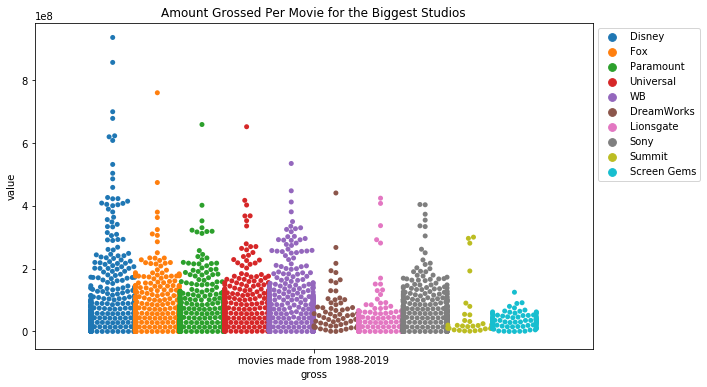

In [74]:
plt.figure(figsize=(10,6))

sns.swarmplot(x='gross',y='value',data=moviemelt,hue='studio',dodge=True)

plt.legend(bbox_to_anchor=(1,1), loc=2)

plt.title('Amount Grossed Per Movie for the Biggest Studios')

In [75]:
mostmovie5.to_csv("mulahmovies.csv", index=False)